# **Problem Statement**

Dalam proyek ini, digunakan dataset "Uber and Lyft Dataset Boston, MA" dari Kaggle yang terdiri dari 693071 baris dan 57 kolom, yang berisi informasi perjalanan rideshare di Boston, Massachusetts, Amerika Serikat. Dengan tujuan utama menganalisis dan memprediksi harga perjalanan Uber dan Lyft berdasarkan berbagai faktor.

# **Data Understanding**

In [36]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_percentage_error
from pickle import dump,load

In [63]:
# Membaca file CSV
df = pd.read_csv("/content/rideshare_kaggle.csv")

# Menampilkan dataset
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [64]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [65]:
# Menampilkan statistika deskriptif dataset
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [66]:
# Menampilkan missing value
df.isnull().sum()[df.isnull().sum()>0]

price    55095
dtype: int64

# **Data Preparation**

In [67]:
# Menghapus missing value
df = df.dropna(subset=['price']).reset_index(drop=True)

In [68]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [69]:
# Menghapus kolom unik dan tidak perlu
df = df.drop(['id','timestamp','hour','day','month','datetime', 'product_id', 'timezone'], axis=1)

In [70]:
# Mendefinisikan kolom dengan tipe data int
var_int = df[['price', 'apparentTemperatureHighTime', 'apparentTemperatureLowTime',
                 'windGustTime', 'sunriseTime', 'sunsetTime', 'uvIndexTime', 'temperatureMinTime', 'temperatureMaxTime',
                 'apparentTemperatureMinTime', 'temperatureLowTime', 'apparentTemperatureMaxTime','windBearing','temperatureHighTime']]

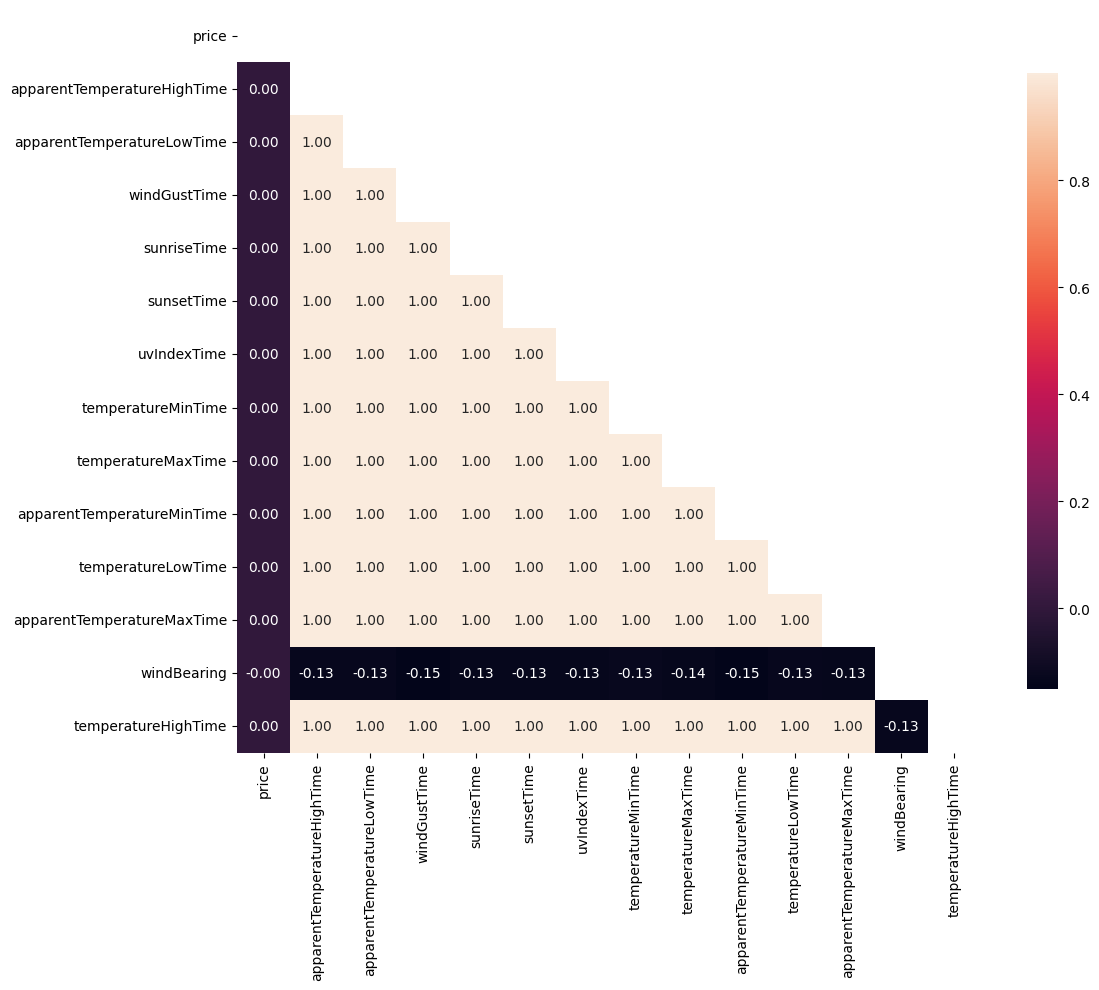

In [71]:
# Membuat correlation matrix
corr_matrix = var_int.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12, 10))

# Membuat heatmap
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            mask=mask,
            cbar_kws={"shrink": 0.8},
            square=True)
plt.show()

Berdasarkan heatmap di atas, variabel-variabel tersebut berwarna gelap yang artinya berkorelasi lemah atau tidak ada korelasi dengan harga. Maka lebih baik dihapus.

In [72]:
df = df.drop(['apparentTemperatureHighTime', 'apparentTemperatureLowTime',
                 'windGustTime', 'sunriseTime', 'sunsetTime', 'uvIndexTime', 'temperatureMinTime', 'temperatureMaxTime',
                 'apparentTemperatureMinTime', 'temperatureLowTime', 'apparentTemperatureMaxTime','windBearing','temperatureHighTime'], axis=1)

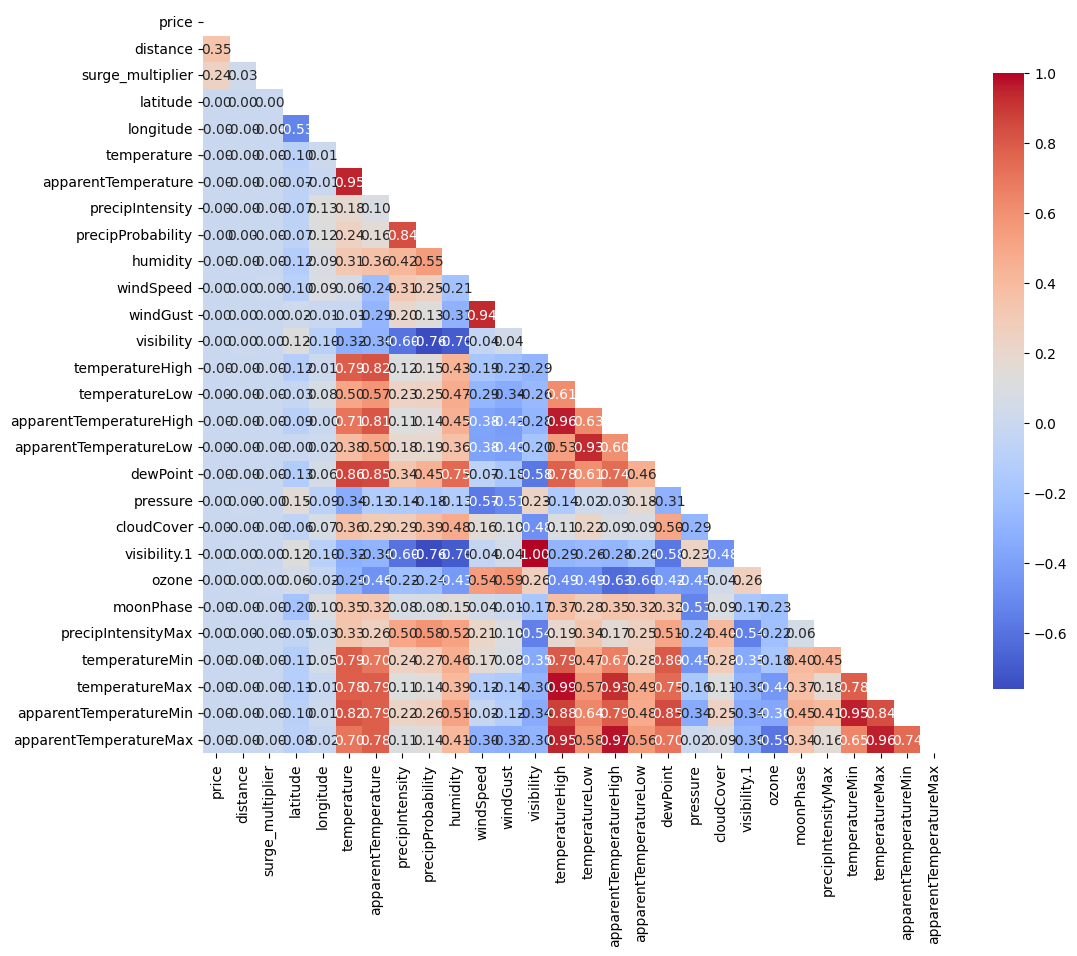

In [73]:
# Mendefinisikan variabel dengan tipe data float
var_float = df.select_dtypes(include=['float']).columns

# Membuat matriks korelasi
corr_matrix = df[var_float.tolist()].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12, 10))

# Membuat heatmap
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",  # Format for the annotations
            cmap="coolwarm",  # Colormap
            mask=mask,  # To hide the upper triangle
            cbar_kws={"shrink": 0.8},  # To adjust the colorbar size
            square=True)  # To make the cells square

plt.show()

Berdasarkan heatmap di atas, variabel yang memiliki warna terang dapat dihapus karena memiliki korelasi yang lemah atau tidak ada korelasi dengan harga. Maka, variabel-variabel tersebut lebih baik dihapus saja.

In [74]:
df = df.drop(['latitude','longitude','temperature','apparentTemperature','precipIntensity',
'precipProbability','humidity','windSpeed','windGust','visibility','temperatureHigh',
'temperatureLow','apparentTemperatureHigh','apparentTemperatureLow','dewPoint','pressure','cloudCover',
'visibility.1','ozone','moonPhase','precipIntensityMax','temperatureMin','temperatureMax','apparentTemperatureMin',
'apparentTemperatureMax'],axis=1)

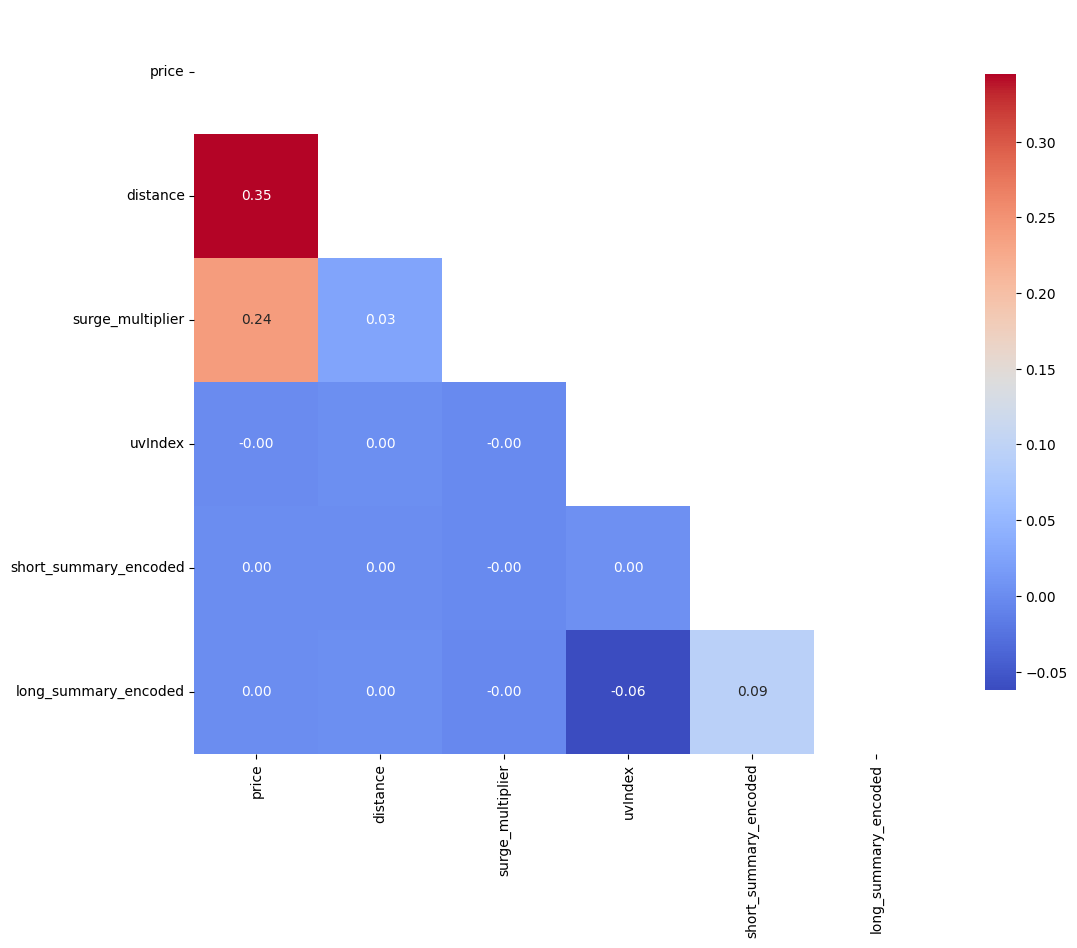

In [75]:
from sklearn.preprocessing import LabelEncoder

# Menggunakan LabelEncoder untuk mengonversi kolom 'short_summary' ke numerik
label_encoder = LabelEncoder()
df['short_summary_encoded'] = label_encoder.fit_transform(df['short_summary'])
df['long_summary_encoded'] = label_encoder.fit_transform(df['long_summary'])

# Pilih kolom-kolom yang ingin dihitung korelasinya terhadap 'price'
var_final = ['price', 'distance', 'surge_multiplier', 'uvIndex', 'short_summary_encoded','long_summary_encoded']

## Membuat correlation matrix
corr_matrix = df[var_final].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12, 10))

# Membuat heatmap
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            mask=mask,
            cbar_kws={"shrink": 0.8},
            square=True)
plt.show()

Berdasarkan heatmap di atas, variabel uvIndex dan short_summary memiliki korelasi lemah atau tidak ada korelasi. Maka dari itu, variabel tersebut lebih baik dihapus agar didapat dataset dengan variabel yang memiliki korelasi terhadap harga.

In [76]:
df = df.drop(['uvIndex','short_summary_encoded','short_summary','long_summary_encoded','long_summary'],axis=1)

In [78]:
for column in df.columns:
    unique_values = df[column].sort_values().unique()
    print(f"Column: {column}")
    print(unique_values)
    print("\n")

Column: source
['Back Bay' 'Beacon Hill' 'Boston University' 'Fenway'
 'Financial District' 'Haymarket Square' 'North End' 'North Station'
 'Northeastern University' 'South Station' 'Theatre District' 'West End']


Column: destination
['Back Bay' 'Beacon Hill' 'Boston University' 'Fenway'
 'Financial District' 'Haymarket Square' 'North End' 'North Station'
 'Northeastern University' 'South Station' 'Theatre District' 'West End']


Column: cab_type
['Lyft' 'Uber']


Column: name
['Black' 'Black SUV' 'Lux' 'Lux Black' 'Lux Black XL' 'Lyft' 'Lyft XL'
 'Shared' 'UberPool' 'UberX' 'UberXL' 'WAV']


Column: price
[ 2.5   3.    3.5   4.5   5.    5.5   6.    6.5   7.    7.5   7.98  8.
  8.35  8.5   9.    9.35  9.5  10.   10.5  10.6  11.   11.5  11.6  12.
 12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5  18.
 18.35 18.5  19.   19.35 19.5  20.   20.5  21.   21.5  22.   22.5  23.
 23.5  24.   24.5  25.   25.5  26.   26.5  27.   27.5  28.   28.35 28.5
 29.   29.5  30.   30.5  31. 

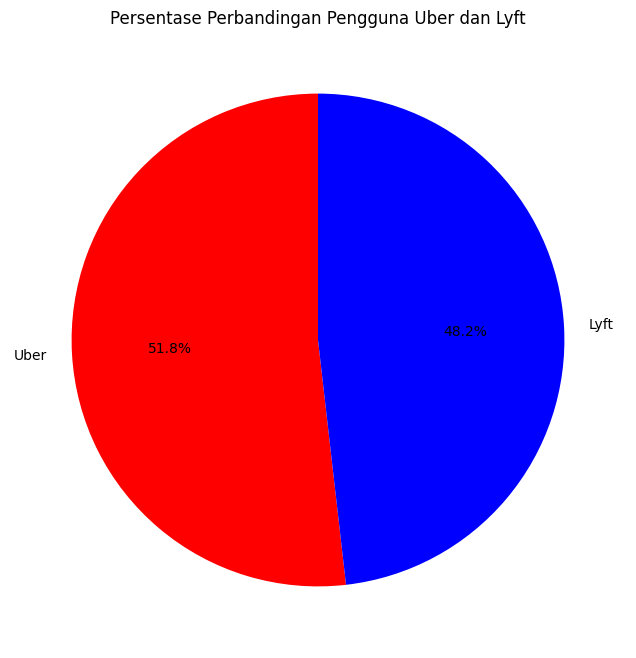

In [79]:
# Menghitung jumlah pengguna Uber dan Lyft
df_counts = df['cab_type'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_counts, labels=df_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'blue'])
plt.title('Persentase Perbandingan Pengguna Uber dan Lyft')
plt.show()

Berdasarkan pie chart di atas, dapat disimpulkan seberapa besar persentase pemesanan yang datang dari masing-masing perusahaan Uber dan Lyft. Dengan demikian, analisis ini dapat memberikan wawasan bagi bisnis untuk memahami preferensi pelanggan terkait perusahaan taksi online Uber dan Lyft di wilayah tersebut. Persentase pemesanan Uber 3,6% lebih banyak dibandingkan dengan Lyft.

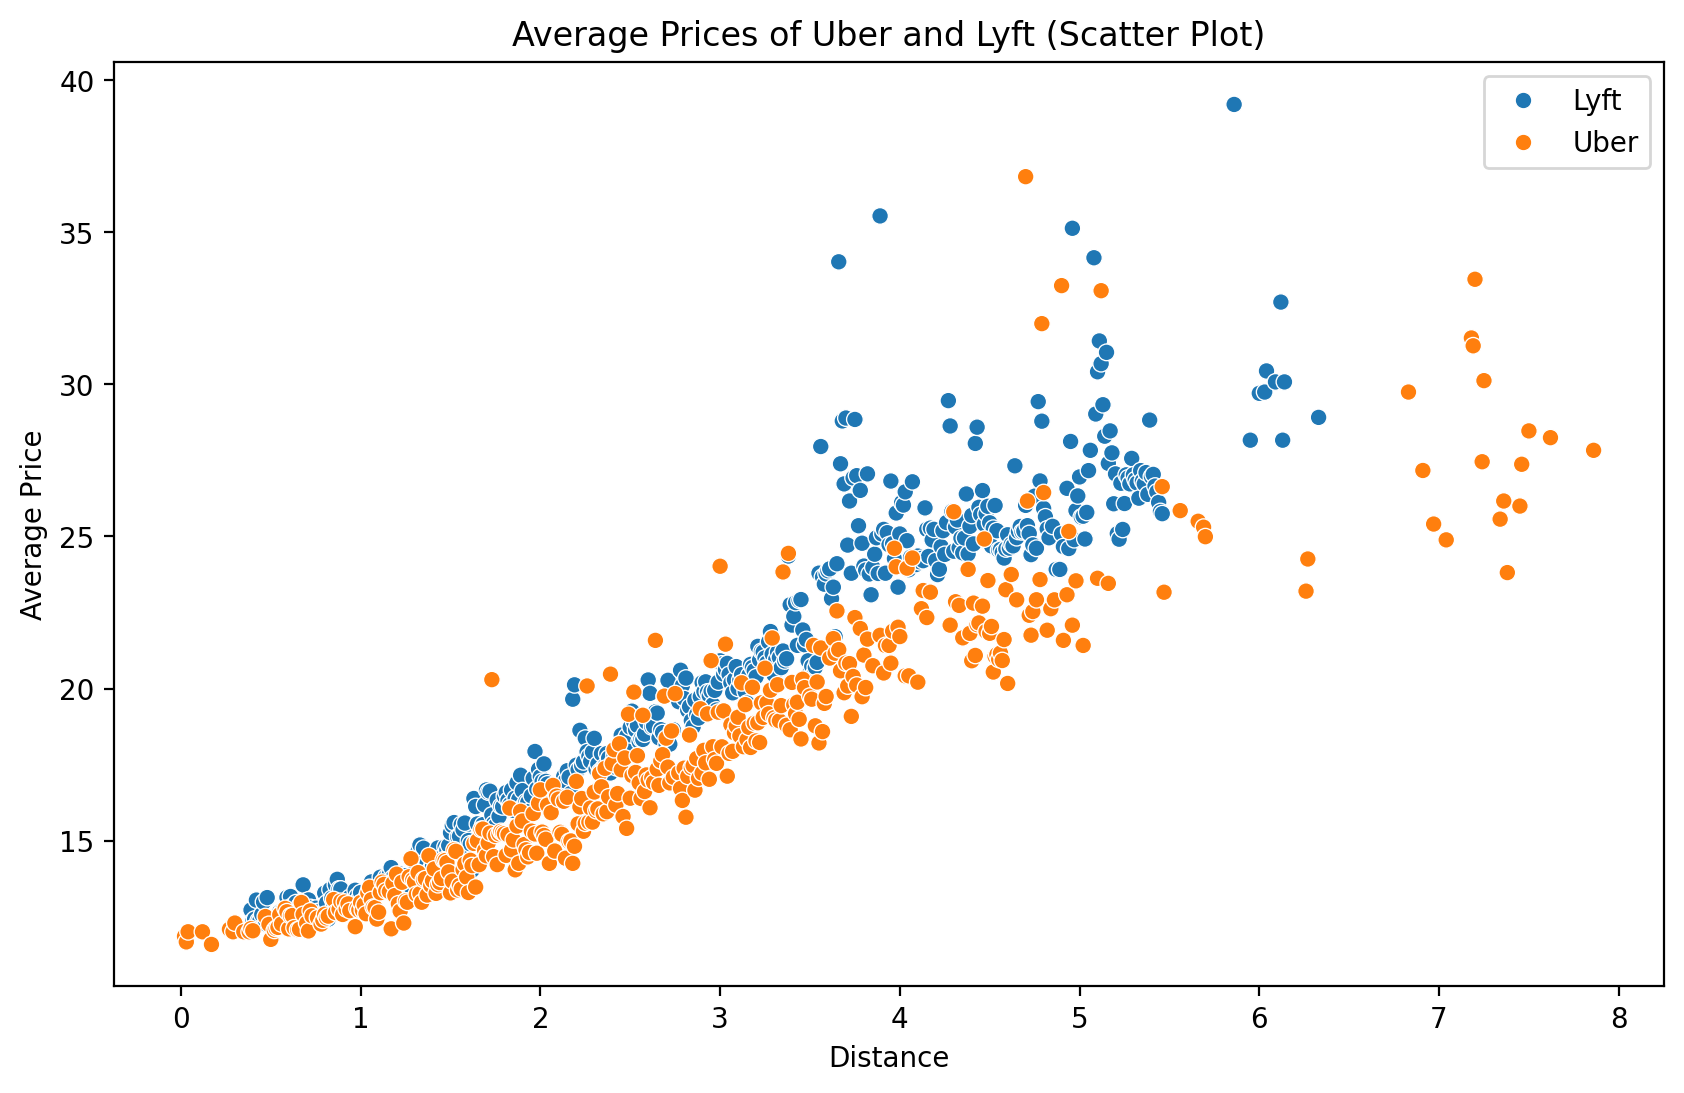

In [80]:
# Menghitung nilai rata-rata untuk setiap kombinasi 'cab_type' dan 'distance'
uber_lyft_average_prices = df.groupby(['cab_type', 'distance'])['price'].mean().reset_index()

# Menampilkan scatter plot nilai rata-rata
plt.figure(figsize=(10, 6), dpi=200)
sns.scatterplot(data=uber_lyft_average_prices, x='distance', y='price', hue='cab_type')
plt.title('Average Prices of Uber and Lyft (Scatter Plot)')
plt.xlabel('Distance')
plt.ylabel('Average Price')
plt.legend()
plt.show()

Berdasarkan scatter plot di atas, kedua layanan Uber dan Lyft terdapat kenaikan harga seiring dengan peningkatan jarak perjalanan. Ini menunjukkan bahwa harga dan jarak memiliki tren positif pada kedua kelompok data. Dalam kategori jarak tertentu, terlihat bahwa harga rata-rata untuk Lyft mungkin lebih tinggi atau lebih rendah daripada Uber. Hal ini terlihat dari sejauh mana kedua garis tren tersebut bersinggungan atau terpisah di beberapa titik. Seiring dengan peningkatan jarak, terlihat adanya variasi harga yang mungkin disebabkan oleh faktor-faktor lain selain jarak, seperti cuaca, rute perjalanan, dan beberapa faktor-faktor yang dapat mempengaruhi.

In [81]:
# Membuat variabel Uber untuk analisis lebih lanjut
uber = df[df['cab_type']=='Uber']

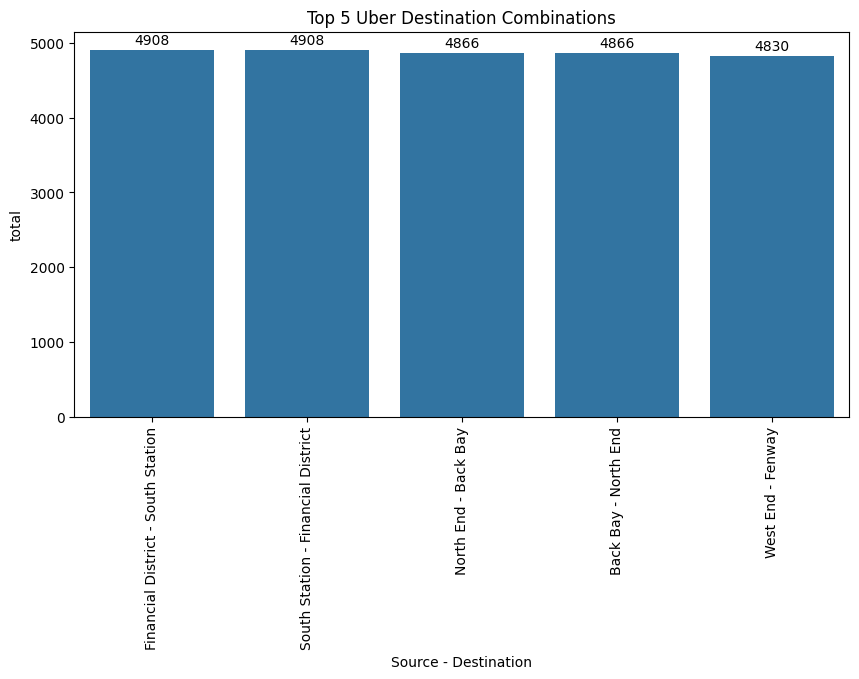

In [82]:
# Melihat 5 tertinggi source dan destinasi pada pengguna Uber
uber_top5 = uber.groupby(['source', 'destination']).size().reset_index()
uber_top5.columns = ['source', 'destination','total']
uber_top5 = uber_top5.sort_values(by='total', ascending=False).head(5)

# Menggabungkan source and destination menjadi satu kolom
uber_top5['Source - Destination'] = uber_top5['source'] + ' - ' + uber_top5['destination']
uber_top5 = uber_top5[['Source - Destination', 'total']]

# Membuat bar plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=uber_top5, x='Source - Destination', y='total')
plt.title("Top 5 Uber Destination Combinations")
plt.xticks(rotation=90)
for i in ax.patches:
    ax.annotate(format(i.get_height(), '0.0f'), (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points')
plt.show()

Berdasarkan bar plot di atas, pengguna Uber paling banyak memesan untuk perjalanan dari Financial District ke South Station ataupun sebaliknya.

In [84]:
# Membuat function
def analyze_direction(source, destination):
    selected_trips = uber[(uber['source'] == source) & (uber['destination'] == destination)]

    # Analisis jenis Uber yang sering dipesan
    popular_uber_types = selected_trips['name'].value_counts().reset_index()
    popular_uber_types.columns = ['Uber Type', 'Total Trips']

    # Membuat bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Uber Type', y='Total Trips', data=popular_uber_types, palette='pastel')
    plt.title(f'Jenis Uber yang sering dipesan dari {source} ke {destination}')
    plt.show()

<ipython-input-84-5965c2772c85>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Uber Type', y='Total Trips', data=popular_uber_types, palette='pastel')


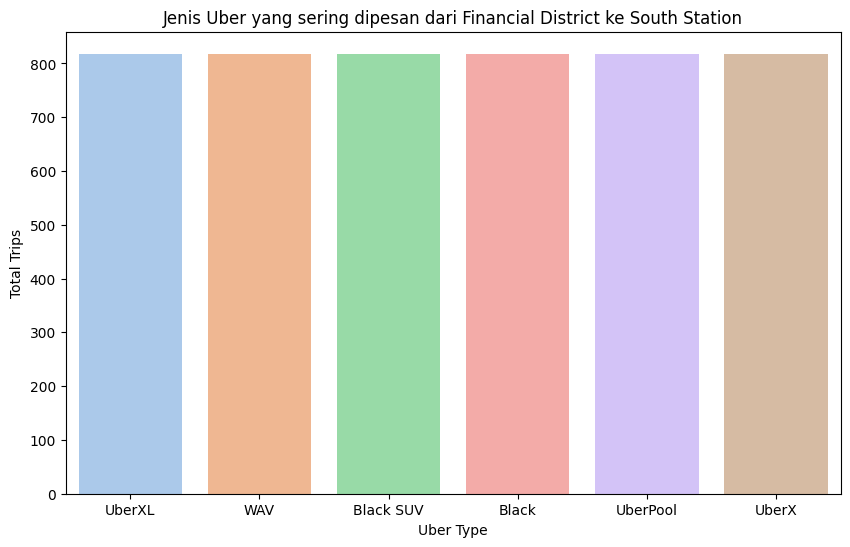

<ipython-input-84-5965c2772c85>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Uber Type', y='Total Trips', data=popular_uber_types, palette='pastel')


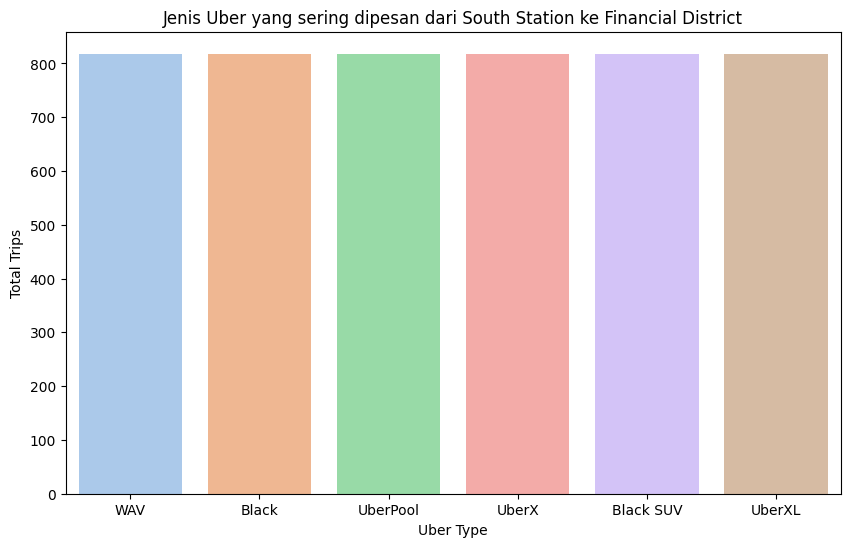

In [85]:
# Analisis perjalanan dari Financial District ke South Station
analyze_direction('Financial District', 'South Station')

# Analisis perjalanan dari South Station ke Financial District
analyze_direction('South Station', 'Financial District')

Berdasarkan bar plot di atas, jenis Uber semuanya rata dipesan tidak ada yang lebih sering dipesan untuk perjalanan dari Financial District ke South Station dan sebaliknya.

In [86]:
# Membuat function untuk mengetahui Uber mana yang memiliki harga paling murah
def find_cheapest_uber(source, destination):
    selected_trips = uber[(uber['source'] == source) & (uber['destination'] == destination)]

    # Temukan jenis Uber dengan harga paling murah
    cheapest_uber_type = selected_trips.loc[selected_trips['price'].idxmin(), 'name']

    print(f"Jenis Uber dengan harga paling murah dari {source} ke {destination}: {cheapest_uber_type}")
    print(f"Harga: {selected_trips['price'].min()}")

In [87]:
# Temukan jenis Uber dengan harga paling murah dari Financial District ke South Station
find_cheapest_uber('Financial District', 'South Station')

# Temukan jenis Uber dengan harga paling murah dari South Station ke Financial District
find_cheapest_uber('South Station', 'Financial District')

Jenis Uber dengan harga paling murah dari Financial District ke South Station: UberPool
Harga: 5.5
Jenis Uber dengan harga paling murah dari South Station ke Financial District: UberPool
Harga: 4.5


Dikarenakan pada analisis sebelumnya memberikan informasi bahwa semua jenis Uber memiliki jumlah pesanan yang sama. Maka, kita lihat jenis Uber mana yang memiliki harga lebih terjangkau. Jika berangkat dari Financial District ke South Station bisa menggunakan UberPool dengan harga 5.5. Jika berangkat dari South Station ke Financial District bisa menggunakan UberPool dengan harga 4.5

# **Modeling**

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   source            637976 non-null  object 
 1   destination       637976 non-null  object 
 2   cab_type          637976 non-null  object 
 3   name              637976 non-null  object 
 4   price             637976 non-null  float64
 5   distance          637976 non-null  float64
 6   surge_multiplier  637976 non-null  float64
 7   icon              637976 non-null  object 
dtypes: float64(3), object(5)
memory usage: 38.9+ MB


In [89]:
df.isnull().sum()

source              0
destination         0
cab_type            0
name                0
price               0
distance            0
surge_multiplier    0
icon                0
dtype: int64

In [90]:
# Mendefinisikan variabel X dan y
X = df.drop(columns=['price'])
y = df['price']

In [91]:
# Membuat data training dan testing dengan 30% sebagai data testing dan 70% sebagai data training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [100]:
# Mengambil kolom yang masih berupa object dan kategori
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

from category_encoders import TargetEncoder
target_encoder = TargetEncoder()
categorical_transformer = Pipeline(steps=[('target_encoder', target_encoder)])

#column transformer to pandas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)],
        verbose_feature_names_out=False,
        remainder='passthrough').set_output(transform="pandas")

X_train_prep = preprocessor.fit_transform(X_train,y_train)

In [102]:
X_test_prep = preprocessor.transform(X_test)
X_train_prep

,source,destination,cab_type,name,icon,distance,surge_multiplier
240787,18.837309,16.246365,17.345627,9.606678,16.500279,2.70,1.25
546200,16.078312,14.226521,15.767763,9.757927,16.525293,0.72,1.00
552444,18.141223,14.226521,17.345627,6.032479,16.570049,1.00,1.00
449408,16.603899,15.001413,17.345627,15.287742,16.563929,1.72,1.00
299557,16.331651,17.839556,15.767763,15.672489,16.570049,3.30,1.00
...,...,...,...,...,...,...,...
558088,16.078312,18.893000,17.345627,9.606678,16.399400,2.88,1.00
124605,15.642770,18.098668,17.345627,15.287742,16.500279,2.41,1.00
544751,18.141223,18.893000,17.345627,15.287742,16.500279,5.41,1.00
18638,16.078312,15.001413,15.767763,15.672489,16.525293,0.98,1.00


In [103]:
y

0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
637971     9.5
637972    13.0
637973     9.5
637974    27.0
637975    10.0
Name: price, Length: 637976, dtype: float64

In [104]:
# Membuat model sekaligus melatih
model_train = sm.OLS(y_train,X_train_prep).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                          3.554e+06
Date:                Sun, 09 Jun 2024   Prob (F-statistic):                        0.00
Time:                        10:05:18   Log-Likelihood:                     -1.0464e+06
No. Observations:              446583   AIC:                                  2.093e+06
Df Residuals:                  446576   BIC:                                  2.093e+06
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
source              -0.0742      0.003    -24.985      0.000      -0.080      -0.068
destination         -0.0062      0.003     -1.995      0.046      -0.012      -0.000
cab_type            -0.3478      0.005    -71.586      0.000      -0.357      -0.338
name                 0.9909      0.000   2143.201      0.000       0.990       0.992
icon                -1.0608      0.007   -158.308      0.000      -1.074      -1.048
distance             2.8392      0.004    661.616      0.000       2.831       2.848
surge_multiplier    18.2755      0.040    453.804      0.000      18.197      18.354
==============================================================================
Omnibus:                   177977.156   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3115784.085
Skew:                           1.467   Prob(JB):                         0.00
Kurtosis:                      15.603   Cond. No.                         398.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
# Melakukan prediksi terhadap data uji
y_pred = model_train.predict(X_test_prep)

# **Model Evaluation**

In [106]:
# Evaluasi model
mape = mean_absolute_percentage_error(y_test,y_pred)

print("Mean Absolut Percentage Error:", mape)

Mean Absolut Percentage Error: 0.13511831913502956


In [107]:
# Menyimpan final model untuk diuji
models = [model_train]
names = ["Linear Regression"]
extension = "json"

for model,name in zip(models,names):
    with open(f"{name}.{extension}","wb") as files:
        dump(model,files)
    print(f"{name}.{extension} has been downloaded")

Linear Regression.json has been downloaded


In [108]:
# Contoh data uji
data_test = {
    'source': ['Back Bay', 'Beacon Hill', 'Boston University', 'Fenway', 'Financial District'],
    'destination': ['South Station', 'North Station', 'Haymarket Square', 'Theatre District', 'West End'],
    'cab_type': ['Lyft', 'Uber', 'Lyft', 'Uber', 'Lyft'],
    'name': ['Black', 'Lux', 'Lyft', 'UberPool', 'Lyft XL'],
    'icon': ['clear-day', 'clear-night', 'cloudy', 'fog', 'partly-cloudy-day'],
    'distance': [0.02, 0.03, 0.04, 0.12, 0.17],
    'surge_multiplier': [1.0, 1.25, 1.5, 1.75, 2.0],
}

new_df = pd.DataFrame(data_test)

In [109]:
# menggunakan model untuk inferensi pada data baru
new_data_point = [[new_df]]

In [110]:
X = preprocessor.transform(new_df)

In [111]:
print(X)
print(y)

      source  destination   cab_type       name       icon  distance  \
0  16.045406    14.831471  17.345627  20.527804  16.528445      0.02   
1  15.642770    16.783792  15.767763  17.758969  16.528445      0.03   
2  18.837309    14.226521  17.345627   9.606678  16.528445      0.04   
3  18.385790    15.998215  15.767763   8.744509  16.528445      0.12   
4  18.141223    16.209489  17.345627  15.287742  16.528445      0.17   

   surge_multiplier  
0              1.00  
1              1.25  
2              1.50  
3              1.75  
4              2.00  
0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
637971     9.5
637972    13.0
637973     9.5
637974    27.0
637975    10.0
Name: price, Length: 637976, dtype: float64


In [112]:
new_df_pred = model_train.predict(X)
print(new_df_pred)

0    13.824468
1    16.244562
2    11.993904
3    16.506804
4    27.169399
dtype: float64


# **Conclusion**



1.   Hasil analisis menggunakan Linear Regression dengan tingkat kepercayaan 95% menunjukkan bahwa semua variabel yang dipilih (source, destination, cab_type, name, distance, surge multiplier, dan icon) memiliki nilai p-value kurang dari 5%, menunjukkan pengaruh yang signifikan terhadap harga.
2.   Nilai R-squared (R2) dari model Linear Regression adalah 0.928, menunjukkan bahwa model mampu menjelaskan 92.8% variasi dalam data harga. Model prediksi secara keseluruhan baik dan mampu memberikan estimasi harga perjalanan dengan baik, dengan tingkat akurasi sebesar 92,8%.
1.   Rata-rata persentase kesalahan mutlak (MAPE) dari model Linear Regression 0.135, menunjukkan bahwa model memiliki tingkat kesalahan yang rendah.
